# LSTM vs ANN for Stock price prediction


# 0. Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Flatten 
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


# 1. Data Pre-processing

In [2]:
read_csv_setting = {'index_col': 0}
dataSet = pd.read_csv(r'transformed_dataset.csv',header=[0, 1],**read_csv_setting)

tickers = ['AAPL','AMZN','FB','GOOGL','MSFT','^GSPC']
def SingleStockData(ticker='MSFT'):        
    data= dataSet.xs('MSFT', level=1, axis=1)
    data.tail()

# please uncomment the section for different stocks
#=====================APPLE===========================================
stocks= [dataSet.xs(ticker, level=1, axis=1) for ticker in tickers]
pirce1= stocks[1]['Close']
pirce2= stocks[2]['Close']
pirce3= stocks[3]['Close']
pirce4= stocks[4]['Close']
pirce_SP500= stocks[5]['Close']

data = stocks[0]
data['price1'] = pirce1
data['price2'] = pirce2
data['price3'] = pirce3
data['price4'] = pirce4
data['pirce_S&P'] = pirce_SP500

'''
#=====================AMAZON===========================================
stocks= [dataSet.xs(ticker, level=1, axis=1) for ticker in tickers]
pirce1= stocks[0]['Close']
pirce2= stocks[2]['Close']
pirce3= stocks[3]['Close']
pirce4= stocks[4]['Close']
pirce_SP500= stocks[5]['Close']

data = stocks[1]
data['price1'] = pirce1
data['price2'] = pirce2
data['price3'] = pirce3
data['price4'] = pirce4
data['pirce_S&P'] = pirce_SP500

#=====================FACEBOOK===========================================
stocks= [dataSet.xs(ticker, level=1, axis=1) for ticker in tickers]
pirce1= stocks[0]['Close']
pirce2= stocks[1]['Close']
pirce3= stocks[3]['Close']
pirce4= stocks[4]['Close']
pirce_SP500= stocks[5]['Close']

data = stocks[2]
data['price1'] = pirce1
data['price2'] = pirce2
data['price3'] = pirce3
data['price4'] = pirce4
data['pirce_S&P'] = pirce_SP500

#=====================GOOGLE===========================================
stocks= [dataSet.xs(ticker, level=1, axis=1) for ticker in tickers]
pirce1= stocks[0]['Close']
pirce2= stocks[1]['Close']
pirce3= stocks[2]['Close']
pirce4= stocks[4]['Close']
pirce_SP500= stocks[5]['Close']

data = stocks[3]
data['price1'] = pirce1
data['price2'] = pirce2
data['price3'] = pirce3
data['price4'] = pirce4
data['pirce_S&P'] = pirce_SP500

#=====================MICROSOFT===========================================
stocks= [dataSet.xs(ticker, level=1, axis=1) for ticker in tickers]
pirce1= stocks[0]['Close']
pirce2= stocks[1]['Close']
pirce3= stocks[2]['Close']
pirce4= stocks[3]['Close']
pirce_SP500= stocks[5]['Close']

data = stocks[4]
data['price1'] = pirce1
data['price2'] = pirce2
data['price3'] = pirce3
data['price4'] = pirce4
data['pirce_S&P'] = pirce_SP500

print(data.shape)
'''

(2517, 17)


C:\Users\ANPC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ANPC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ANPC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [3]:
# print the data
data

,Close,Adj Close,Open,High,Low,Volume,Close_ema_20,Return,Return_60,Volatility_20,Volatility_60,RSI_14,price1,price2,price3,price4,pirce_S&P
2010-04-01,33.709999,29.261658,33.915714,34.104286,33.250000,150786300,33.709999,0.000000,0.000000,0.000000,0.000000,0.000000,131.809998,0.000000,284.684692,29.160000,1178.099976
2010-04-05,34.070000,29.574146,33.568573,34.072857,33.538570,171126900,33.899000,0.010679,0.000000,0.000000,0.000000,100.000000,131.490005,0.000000,285.790802,29.270000,1187.439941
2010-04-06,34.220001,29.704361,34.028572,34.320000,33.857143,111754300,34.016869,0.004403,0.000000,0.000000,0.000000,100.000000,135.559998,0.000000,284.394409,29.320000,1189.439941
2010-04-07,34.371429,29.835800,34.221428,34.560001,34.094284,157125500,34.119225,0.004425,0.000000,0.000000,0.000000,100.000000,134.869995,0.000000,282.052063,29.350000,1182.449951
2010-04-08,34.278572,29.755198,34.348572,34.505714,34.005714,143247300,34.157770,-0.002702,0.000000,0.000000,0.000000,83.740942,140.960007,0.000000,284.029022,29.920000,1186.439941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-25,245.520004,245.520004,250.750000,258.250000,244.300003,75900500,262.464774,-0.005509,-0.152795,0.067645,0.041422,44.490855,1885.839966,156.210007,1101.619995,146.919998,2475.560059
2020-03-26,258.440002,258.440002,246.520004,258.679993,246.360001,63021800,262.081462,0.052623,-0.113474,0.067392,0.042007,52.061203,1955.489990,163.339996,1162.920044,156.110001,2630.070068
2020-03-27,247.740005,247.740005,252.750000,255.869995,247.050003,51054200,260.715609,-0.041402,-0.156343,0.068004,0.042310,46.058703,1900.099976,156.789993,1110.260010,149.699997,2541.469971
2020-03-30,254.809998,254.809998,250.740005,255.520004,249.399994,41994100,260.153170,0.028538,-0.151623,0.064667,0.042373,50.417158,1963.949951,165.949997,1146.310059,160.229996,2626.649902


### setup the training and testing datasets

In [4]:

idate = '2015-03-31'

data_training = data[data.index<idate].copy()
data_test = data[data.index>=idate].copy()


print(data_training.shape)
print(data_test.shape)

(1257, 17)
(1260, 17)


### data normalization

In [5]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler_single = MinMaxScaler(feature_range = (0, 1))
scaled_data = np.concatenate([scaler_single.fit_transform(data_training[['Close']]),
                              scaler.fit_transform(data_training[['Adj Close','Open','High','Low','Volume','Close_ema_20',
                                                                  'Return','Return_60','Volatility_20','Volatility_60','RSI_14']]), 
                                  ], axis = 1)

### setup the labels and input sequence

In [7]:
X_train = []
y_train = []

In [8]:
lookback = 60

for i in range(lookback, scaled_data.shape[0]):
    X_train.append(scaled_data[i-lookback:i])
    y_train.append(scaled_data[i, 0])

In [9]:
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1197, 60, 12)
(1197,)


# 2. LSTM Model

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import optimizers

features = X_train.shape[2]
input_size= lookback

model = Sequential()

model.add(LSTM(units = input_size, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], features)))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.2))


model.add(Dense(units = 1))

model.compile(optimizer='adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            17520     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 120)               86880     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 121       
Total params: 104,521
Trainable params: 104,521
Non-trainable params: 0
_________________________________________________________________


In [11]:
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=True)
model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

Train on 1197 samples
Epoch 1/100
1197/1197 [==============================] - 5s 4ms/sample - loss: 0.0270
Epoch 2/100
1197/1197 [==============================] - 3s 2ms/sample - loss: 0.0033
Epoch 3/100
1197/1197 [==============================] - 3s 2ms/sample - loss: 0.0024
Epoch 4/100
1197/1197 [==============================] - 3s 2ms/sample - loss: 0.0025
Epoch 5/100
1197/1197 [==============================] - 3s 2ms/sample - loss: 0.0023
Epoch 6/100
1197/1197 [==============================] - 2s 2ms/sample - loss: 0.0025
Epoch 7/100
1197/1197 [==============================] - 3s 2ms/sample - loss: 0.0023
Epoch 8/100
1197/1197 [==============================] - 2s 2ms/sample - loss: 0.0021
Epoch 9/100
1197/1197 [==============================] - 3s 2ms/sample - loss: 0.0018
Epoch 10/100
1197/1197 [==============================] - 3s 2ms/sample - loss: 0.0020
Epoch 11/100
1197/1197 [==============================] - 2s 2ms/sample - loss: 0.0018
Epoch 12/100
1197/1197 [======

### data preprocessing for the testset

In [12]:
#prepare test data input

# get extra 60 day 
data_training_original = data[data.index<idate].copy()
data_training_original.tail(lookback)
past_60_days = data_training_original.tail(lookback)
df = past_60_days.append(data_test, ignore_index = True)
df.tail()

,Close,Adj Close,Open,High,Low,Volume,Close_ema_20,Return,Return_60,Volatility_20,Volatility_60,RSI_14,price1,price2,price3,price4,pirce_S&P
1315,245.520004,245.520004,250.750000,258.250000,244.300003,75900500,262.464774,-0.005509,-0.152795,0.067645,0.041422,44.490855,1885.839966,156.210007,1101.619995,146.919998,2475.560059
1316,258.440002,258.440002,246.520004,258.679993,246.360001,63021800,262.081462,0.052623,-0.113474,0.067392,0.042007,52.061203,1955.489990,163.339996,1162.920044,156.110001,2630.070068
1317,247.740005,247.740005,252.750000,255.869995,247.050003,51054200,260.715609,-0.041402,-0.156343,0.068004,0.042310,46.058703,1900.099976,156.789993,1110.260010,149.699997,2541.469971
1318,254.809998,254.809998,250.740005,255.520004,249.399994,41994100,260.153170,0.028538,-0.151623,0.064667,0.042373,50.417158,1963.949951,165.949997,1146.310059,160.229996,2626.649902
1319,254.289993,254.289993,255.600006,262.489990,252.000000,49250500,259.594772,-0.002041,-0.145043,0.064383,0.042361,50.073792,1949.719971,166.800003,1161.949951,157.710007,2584.590088


In [13]:
inputs = np.concatenate([scaler_single.fit_transform(df[['Close']]),
                              scaler.fit_transform(df[['Adj Close','Open','High','Low','Volume','Close_ema_20','Return',
                                                       'Return_60','Volatility_20','Volatility_60','RSI_14']]), 
                                  ], axis = 1)
X_test = []
y_test = []

for i in range(lookback, inputs.shape[0]):
    X_test.append(inputs[i-lookback:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((1260, 60, 12), (1260,))

### predict the testset andd visulize the result

In [14]:
y_pred = model.predict(X_test)

In [15]:
y_pred = scaler_single.inverse_transform(y_pred)
y_test = scaler_single.inverse_transform(y_test.reshape(-1, 1))

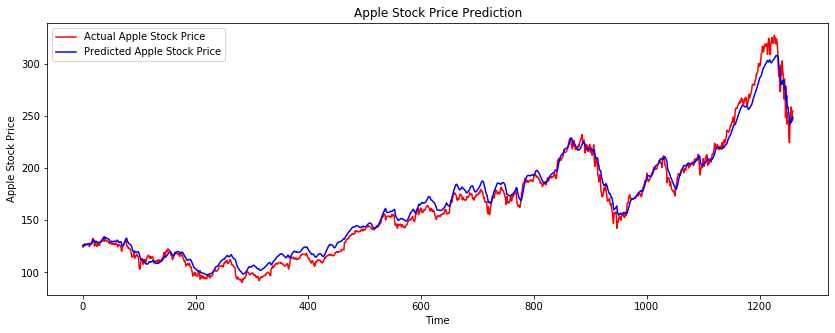

In [16]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Actual Apple Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [17]:
#print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred)))

The R2 score on the Test set is:	0.982


# 3. Simple Neural Network Model

In [19]:
nn_model = Sequential()
nn_model.add(Dense(units=input_size,  activation='relu', input_shape = (X_train.shape[1], features)))
nn_model.add(Dropout(0.2))

nn_model.add(Flatten())
nn_model.add(Dense(units = 120,  activation='relu'))
nn_model.add(Dropout(0.2))

nn_model.add(Dense(units = 1))

nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60, 60)            780       
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
flatten (Flatten)            (None, 3600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               432120    
_________________________________________________________________
dropout_3 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 121       
Total params: 433,021
Trainable params: 433,021
Non-trainable params: 0
________________________________________________

In [20]:
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

Train on 1197 samples
Epoch 1/100
1197/1197 [==============================] - 0s 376us/sample - loss: 0.2863
Epoch 2/100
1197/1197 [==============================] - 0s 77us/sample - loss: 0.0142
Epoch 3/100
1197/1197 [==============================] - 0s 77us/sample - loss: 0.0116
Epoch 4/100
1197/1197 [==============================] - 0s 82us/sample - loss: 0.0099
Epoch 5/100
1197/1197 [==============================] - 0s 83us/sample - loss: 0.0113
Epoch 6/100
1197/1197 [==============================] - 0s 77us/sample - loss: 0.0089
Epoch 7/100
1197/1197 [==============================] - 0s 76us/sample - loss: 0.0099
Epoch 8/100
1197/1197 [==============================] - 0s 80us/sample - loss: 0.0092
Epoch 9/100
1197/1197 [==============================] - 0s 82us/sample - loss: 0.0100
Epoch 10/100
1197/1197 [==============================] - 0s 76us/sample - loss: 0.0090
Epoch 11/100
1197/1197 [==============================] - 0s 76us/sample - loss: 0.0082
Epoch 12/100
1197/

### predict the testset and visulize the result

In [21]:
y_pred_nn = nn_model.predict(X_test)
y_pred_nn = scaler_single.inverse_transform(y_pred_nn)

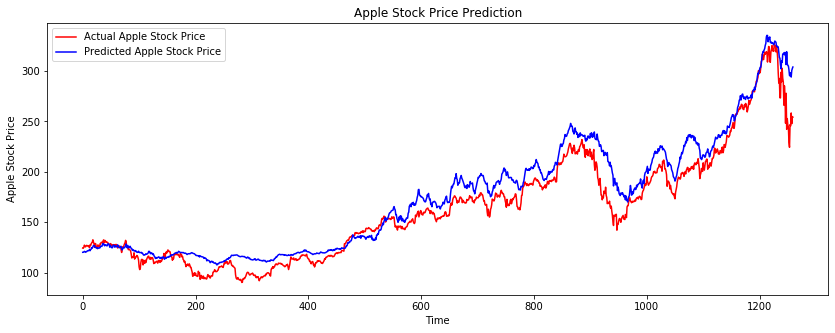

In [22]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Actual Apple Stock Price')
plt.plot(y_pred_nn, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [23]:
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_nn)))

The R2 score on the Test set is:	0.906


# 4. p-value for r-square

### trun the testset into ten folds

In [25]:
import numpy as np
NUM_FOLDS = 10

Y_gold_folds = np.array_split(y_test, NUM_FOLDS)
Y_sys1_folds = np.array_split(y_pred, NUM_FOLDS)
Y_sys2_folds = np.array_split(y_pred_nn, NUM_FOLDS)


### calculate the r-squre score and p value

In [26]:
from scipy import stats
def score_folds(Ygf, Ysf, scorer, **kwargs):
    for Yg, Ys in zip(Ygf, Ysf):
        yield scorer(Yg, Ys, **kwargs)
        
Y_sys1_accuracy = list(score_folds(Y_gold_folds, Y_sys1_folds, r2_score))
Y_sys2_accuracy = list(score_folds(Y_gold_folds, Y_sys2_folds, r2_score))

print("System 1 mu, sigma:", np.mean(Y_sys1_accuracy), np.std(Y_sys1_accuracy))
print("System 2 mu, sigma:", np.mean(Y_sys2_accuracy), np.std(Y_sys2_accuracy))




System 1 mu, sigma: 0.5380547191137856 0.4155694171630826
System 2 mu, sigma: -1.0833420191270493 1.6658143201661624


In [27]:
def ttest_across_folds(Ygf, Y1f, Y2f, scorer, **kwargs):
    sys1_scores = list(score_folds(Ygf, Y1f, scorer, **kwargs))
    sys2_scores = list(score_folds(Ygf, Y2f, scorer, **kwargs))
    print("P-value for H1 sys1 (mu={:.3f}) > sys2 (mu={:.3f}) by {}:"\
          .format(np.mean(sys1_scores), np.mean(sys2_scores), scorer.__name__))
    print(stats.ttest_rel(sys1_scores, sys2_scores).pvalue*0.5)

ttest_across_folds(Y_gold_folds, Y_sys1_folds, Y_sys2_folds, r2_score)

P-value for H1 sys1 (mu=0.538) > sys2 (mu=-1.083) by r2_score:
0.0029221793595462647


# 5. p-value for RMSE 

In [28]:
from sklearn.metrics import mean_squared_error

from math import sqrt


### turn testset into 10 folds

In [ ]:
import numpy as np
NUM_FOLDS = 10

Y_gold_folds = np.array_split(y_test, NUM_FOLDS)
Y_sys1_folds = np.array_split(y_pred, NUM_FOLDS)
Y_sys2_folds = np.array_split(y_pred_nn, NUM_FOLDS)

### calculate numer of prediction which is out of 95% confience interval in LSTM and simple nn models

In [30]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('rmse:')
print(rmse)
print('95% confidence interval for lstm:')
print(rmse*2)

num_out_of_confidence = (y_test-y_pred> rmse*2).sum()
print('num_out_of_confidence:')
print(num_out_of_confidence)

num_tesdata = len(y_test)
print('num_tesdata: ')
print(num_tesdata)

print('% of data out of confidence: ')
print(num_out_of_confidence/ num_tesdata*100)

rmse:
7.023522108878896
95% confidence interval for lstm:
14.047044217757792
num_out_of_confidence:
34
num_tesdata: 
1260
% of data out of confidence: 
2.6984126984126986


In [31]:
rmse = sqrt(mean_squared_error(y_test, y_pred_nn))
print(rmse)
print('95% confidence interval for simple neural network:')
print(rmse*2)

rmse = sqrt(mean_squared_error(y_test, y_pred_nn))
print('rmse:')
print(rmse)
print('95% confidence interval for lstm:')
print(rmse*2)

num_out_of_confidence = (y_test-y_pred_nn> rmse*2).sum()
print('num_out_of_confidence:')
print(num_out_of_confidence)

num_tesdata = len(y_test)
print('num_tesdata: ')
print(num_tesdata)

print('% of data out of confidence: ')
print(num_out_of_confidence/ num_tesdata*100)


16.261021242665898
95% confidence interval for simple neural network:
32.522042485331795
rmse:
16.261021242665898
95% confidence interval for lstm:
32.522042485331795
num_out_of_confidence:
0
num_tesdata: 
1260
% of data out of confidence: 
0.0


#### calculate the average rmse and pvalues base on 10 folds

In [32]:
from scipy import stats
from sklearn.metrics import mean_squared_error

def error_folds(Ygf, Ysf):
    for Yg, Ys in zip(Ygf, Ysf):
        yield sqrt(mean_squared_error(Yg, Ys))
        
Y_sys1_rmse = list(error_folds(Y_gold_folds, Y_sys1_folds))
Y_sys2_rmse = list(error_folds(Y_gold_folds, Y_sys2_folds))

print("System 1 mu, sigma:", np.mean(Y_sys1_rmse), np.std(Y_sys1_rmse))
print("System 2 mu, sigma:", np.mean(Y_sys2_rmse), np.std(Y_sys2_rmse))

System 1 mu, sigma: 6.554347955378733 2.5239623003787655
System 2 mu, sigma: 14.937632252957522 6.425570366110291


In [33]:
print(stats.ttest_rel(Y_sys1_rmse, Y_sys2_rmse).pvalue*0.5)

0.0007305228249472621
